# Pycnocline depth and variance calculations comparisons in models and observations

** Summary: **
Compute pycnocline depth as first moment of temperature stratification. Compare timeseries and variance quantities between observations and different model configurations.

** Problems/To do **
* Should relabel 'temp_mod' to 'temp' since the obs data is also stored in this array
* Change ii and jj to iconf and iloc to better represent configuration and location indices.
* Move the calculation of delta to a function since it is called once for model profiles and once for obs. It is also used in other notebooks.

** Notebook: ** pycnocline_mod_obs_virtual_moorings.ipynb

** Author: ** jelt 7 Nov 2016

** Changelog: **
* 7 Nov 2016: get started from jelt script peanom.ipynb



$$\delta = H (T_b - T_{bar}) / (T_{top} - T_b)$$ is the expression used.
Where does this come from?

For a two layer fluid
$$T_{bar} = (h_{top} T_{top} + h_{bot} T_{bot})/H $$
Therefore
$$H T_{bar} = \delta T_{top} + (H-\delta) T_{bot} $$



$$ \delta = H (T_{bar} - T_{bot}) / (T_{top} - T_{bot} )   $$

Pycnocline depth:

* SE:

All the models simulated a surface warming that did not appear in the observations. Hence the pycnocline depth differences.

* Others:

Haven't checked but I would expect a shallower pycnocline to be explainable in terms of lack of sharpness or something.

Pycnocline std=sqrt(variance): This has units of metres. (I previously have talked about variance when I guess I really should sqrt --> standard deviation, so that it has units of metres)

Near the shelf break (ST1, ST2) the std is well represented in AMM60.
Onshelf AMM60 best captures the observed variance.

# NEW ATTEMPT TO PROCESS DATA

In [5]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
import datetime
from copy import deepcopy 

import AMM60_tools
%matplotlib inline

from __future__ import division

In [6]:
# Global constants
time_origin = '1950-01-01 00:00:00'
dstart = datetime.datetime(2012,6,10) # For plotting
dend = datetime.datetime(2012,7,3)

dirname = '/Users/jeff/DATA/FASTNEt/FASTNEt/' # Set path structure for files
dirname = '/media/data1/AMM60/FASTNEt/'

locations = ['ST1','ST2','ST4','ST5','SE']
configurations = ['NNA','AMM60','AMM7','obs'] # Note the observational data is in each config file, except NNA
# The observational data is extracted from the last config file loaded

In [7]:
def readMODELnc(filename, var):
    """ 
    Read a variable from a NEMO output (netcdf 3 or 4)
    """

    f = netcdf.netcdf_file(filename, 'r')
    data = f.variables[var].data
    f.close()

    return data

In [9]:
filename = '/media/data1/AMM60/FASTNEt/AMM60/mooring_ST1.nc'
# read first temp_obs to extract the period with data
temp_obs = readMODELnc(filename,'temp_obs')

mskobs = np.ma.masked_invalid(temp_obs)
Tstart = np.argwhere(mskobs.mean(axis=0))[0]
Tend = np.argwhere(mskobs.mean(axis=0))[-1]

temp_obs = temp_obs[:,Tstart:Tend]
temp_mod = readMODELnc(filename,'temp_mod')[:,Tstart:Tend]
depth = readMODELnc(filename,'depth')
time_counter = readMODELnc(filename,'time')[Tstart:Tend]*86400
max_depth = 150


[delta, delta_nt, internal_tide_map, time_datetime,  pycn_depth_map_3day, internal_tide_map_3day, time_datetime_3day] = AMM60_tools.delta_diagnose( temp_mod, time_counter, depth, max_depth )
[deltaobs, delta_ntobs, internal_tide_mapobs, time_datetimeobs,  pycn_depth_map_3dayobs, internal_tide_map_3dayobs, time_datetime_3dayobs] = AMM60_tools.delta_diagnose( temp_obs, time_counter, depth, max_depth )



FCT
(51, 367)
(367,)
(51,)
150
Chunking done.
FCT
(51, 367)
(367,)
(51,)
150
Chunking done.


/home/karen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/karen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/karen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


# Now call one of the three plotting cells above

(5,)
(5,)


/home/karen/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


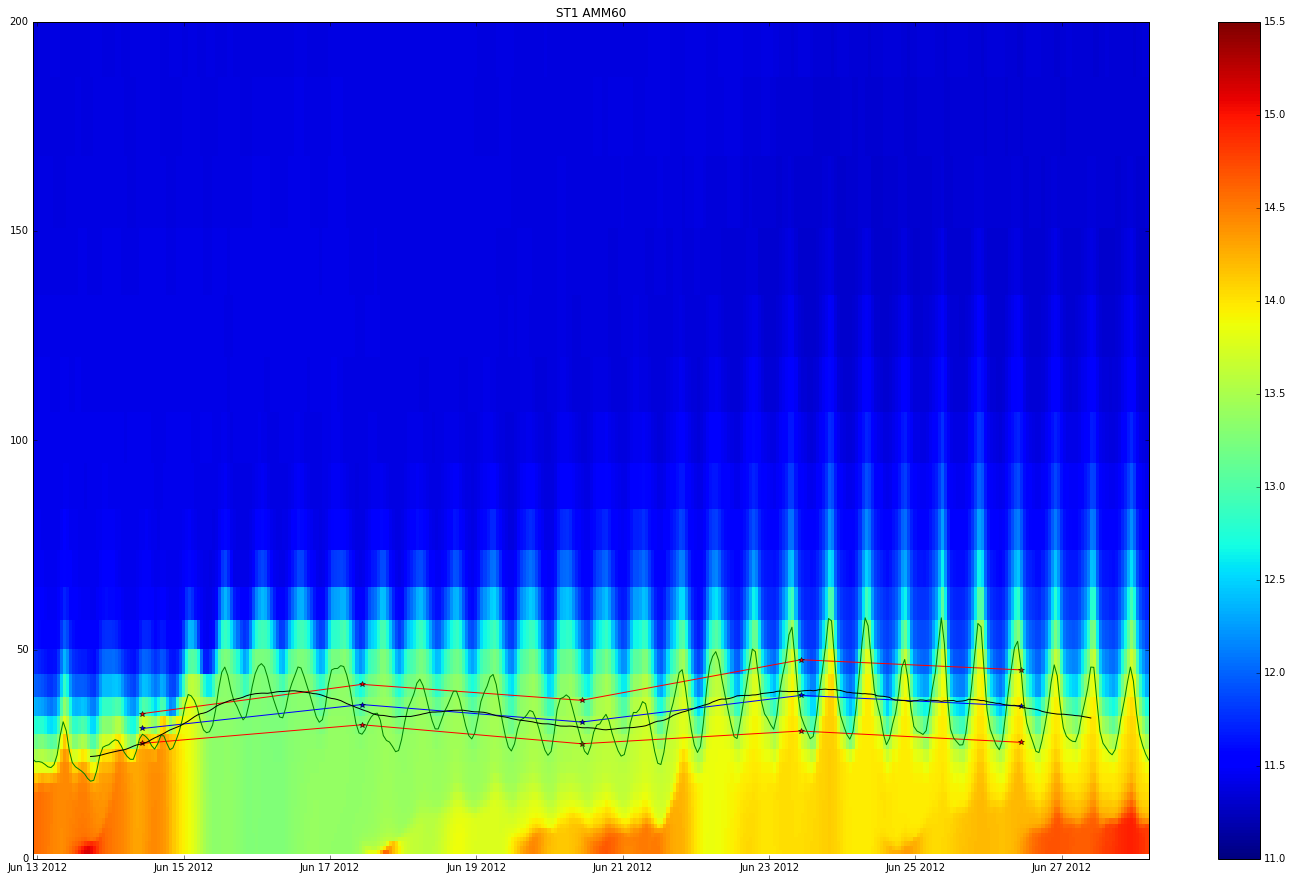

In [10]:
plt.rcParams['figure.figsize'] = (25.0, 15.0) 

plt.pcolormesh(time_datetime,depth,temp_mod)
plt.clim([11,15.5])
plt.title('ST1 AMM60')
plt.ylim([0,200])
plt.colorbar()

print(time_datetime_3day.shape)
print(pycn_depth_map_3day.shape)
plt.plot(time_datetime_3day,pycn_depth_map_3day,'b*-')
plt.plot(time_datetime_3day,pycn_depth_map_3day+np.sqrt(internal_tide_map_3day),'r*-')
plt.plot(time_datetime_3day,pycn_depth_map_3day-np.sqrt(internal_tide_map_3day),'r*-')
plt.plot(time_datetime,delta,'g')
plt.plot(time_datetime,delta_nt,'k')
plt.savefig('ST1_AMM60.png')

(5,)
(5,)


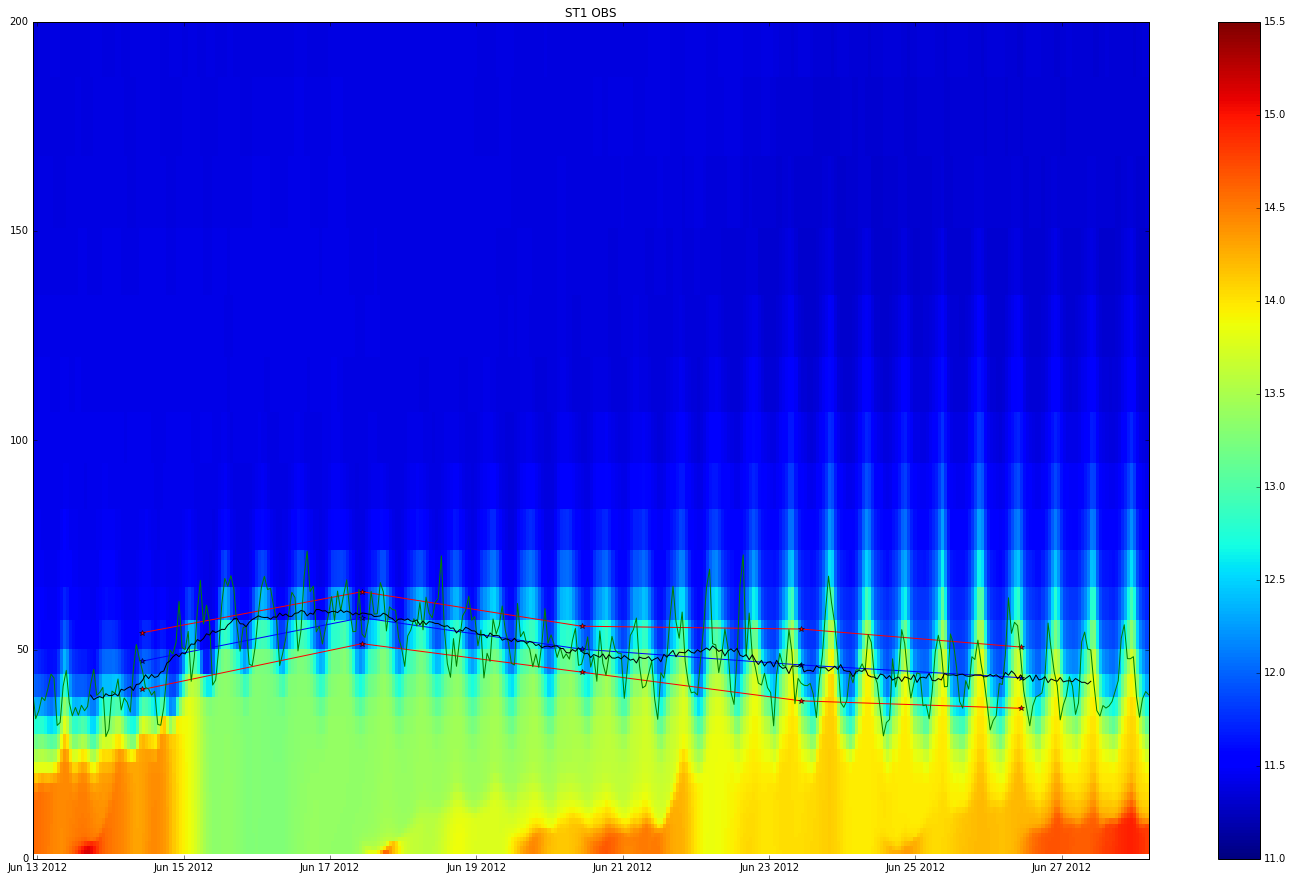

In [11]:

plt.rcParams['figure.figsize'] = (25.0, 15.0) 

plt.pcolormesh(time_datetime,depth,temp_mod)
plt.clim([11,15.5])
plt.title('ST1 OBS')
plt.ylim([0,200])
plt.colorbar()

print(time_datetime_3day.shape)
print(pycn_depth_map_3day.shape)
plt.plot(time_datetime_3dayobs,pycn_depth_map_3dayobs,'b*-')
plt.plot(time_datetime_3dayobs,pycn_depth_map_3dayobs+np.sqrt(internal_tide_map_3dayobs),'r*-')
plt.plot(time_datetime_3dayobs,pycn_depth_map_3dayobs-np.sqrt(internal_tide_map_3dayobs),'r*-')
plt.plot(time_datetimeobs,deltaobs,'g')
plt.plot(time_datetimeobs,delta_ntobs,'k')
plt.savefig('ST1_obs.png')